In [1]:
# Imports 
import tensorflow as tf
import numpy as np

## Creating a **Tensor**





In [2]:
# Rank 0 Tensor
a = tf.constant(3)
print(a)

tf.Tensor(3, shape=(), dtype=int32)


In [3]:
# Rank 1 Tensor
b = tf.constant([1, 2, 3, 4])
print(b)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [4]:
# Rank 2 Tensor
c = tf.constant([[1,2], [3,4]])
print(c)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


# Converting a Numpy array to Tensor

In [5]:
# convert array to tensor
array = np.array([1,2,3,4])
print("Bofore", array)
array = tf.convert_to_tensor(array)
print("After", array)

Bofore [1 2 3 4]
After tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)


# Arthematic operations on Tensor

In [6]:
# 2D tensor
tensor = tf.constant([[1,2],[3,4]])
print(tensor)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [7]:
# add 1 to all positions
tensor = tf.add(tensor, 1)
print("Added 1", tensor)

Added 1 tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [8]:
# Sub 1 from all positions
tensor = tf.subtract(tensor, 1)
print("Subtracted 1", tensor)

Subtracted 1 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [9]:
# Div 2 on all positions
tensor = tf.divide(tensor, 2)
print("Divide by 2", tensor)

Divide by 2 tf.Tensor(
[[0.5 1. ]
 [1.5 2. ]], shape=(2, 2), dtype=float64)


In [10]:
 # Multiply with 2
 tensor = tf.multiply(tensor, 2)
 print("Multiply by 2", tensor)

Multiply by 2 tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float64)


# Matrix Multiplication

In [11]:
tensor = tf.constant([[1, 2], [3, 4]])
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [15, 22]], dtype=int32)>

In [12]:
tf.multiply(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]], dtype=int32)>

# Activations functions

In [13]:
tensor = tf.constant([[1, 2], [5, 10]], dtype=tf.float64)
tensor

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

In [14]:
# Applying softmax
tf.nn.softmax(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.26894142, 0.73105858],
       [0.00669285, 0.99330715]])>

In [15]:
# Applying sigmoid
tf.nn.sigmoid(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.73105858, 0.88079708],
       [0.99330715, 0.9999546 ]])>

In [16]:
# Applying relu
tf.nn.relu(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

In [17]:
# Applying lrelu
tf.nn.leaky_relu(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

# Optimizer

In [18]:
# Tensorflow has all Optimizeers
Optimizer = tf.keras.optimizers.Adam()
print(Optimizer)

# Basic Neural Network Structure

In [19]:
# Start your model with Sequential Object
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2nd layer
model.add(tf.keras.layers.Dense(16))
# print summary to understand your neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
Total params: 880
Trainable params: 880
Non-trainable params: 0
_________________________________________________________________


# Basic neural network





In [20]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
# read dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Churn_Modelling.csv")
                #    parse_dates=True,
                #    infer_datetime_format=True,
                #    index_col = "Date")
data.head(3)


Saving Churn_Modelling.csv to Churn_Modelling (6).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [22]:
# drop unnecessarily columns
data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
# data display
display(data.head(2))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [23]:
# Check if Data has any null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
# Check for Object datatypes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
# Label encode Object Datatypes

data_types_dict = dict(data.dtypes)
data_types_dict.items()

dict_items([('CreditScore', dtype('int64')), ('Geography', dtype('O')), ('Gender', dtype('O')), ('Age', dtype('int64')), ('Tenure', dtype('int64')), ('Balance', dtype('float64')), ('NumOfProducts', dtype('int64')), ('HasCrCard', dtype('int64')), ('IsActiveMember', dtype('int64')), ('EstimatedSalary', dtype('float64')), ('Exited', dtype('int64'))])

In [26]:
# keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name, data_type in data_types_dict.items():
    if data_type == "object":
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [27]:
# split data

X = data.iloc[:, :-1].values.astype(np.float32)
y = data.iloc[:, -1].values.astype(int)

In [28]:
# train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [29]:
# Start your model with Sequential Object
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2ed layer
model.add(tf.keras.layers.Dense(32))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# print summary to understand your neural network flow
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                352       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Create your optimozer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])


In [31]:
# fit model 
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 681.5920 - accuracy: 0.6823 - val_loss: 128.4220 - val_accuracy: 0.7690
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 204.4870 - accuracy: 0.6770 - val_loss: 304.9041 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 259.2464 - accuracy: 0.6721 - val_loss: 620.2976 - val_accuracy: 0.7015
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 207.3091 - accuracy: 0.6770 - val_loss: 169.0556 - val_accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 203.9901 - accuracy: 0.6770 - val_loss: 125.6667 - val_accuracy: 0.6290
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 233.2079 - accuracy: 0.6746 - val_loss: 298.6038 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 190.7802 - accuracy: 0.6716 - val_loss: 69.5345 - 

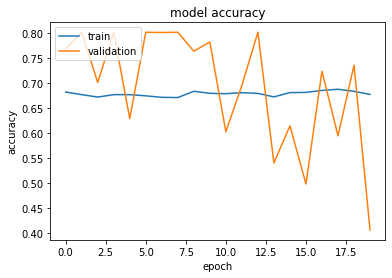

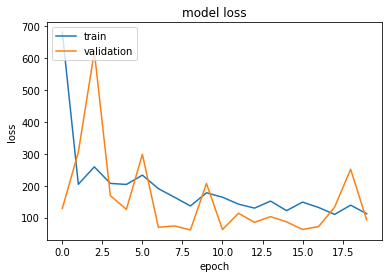

In [32]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable 

In [33]:
# collect predictions
predictions = np.round(model.predict(Xtest))
predictions

63/63 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [34]:
# check Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(ytest, predictions) # Accuracy Seems good

0.406

In [35]:
confusion_matrix(ytest, predictions)

array([[ 543, 1061],
       [ 127,  269]])

In [36]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.81      0.34      0.48      1604
           1       0.20      0.68      0.31       396

    accuracy                           0.41      2000
   macro avg       0.51      0.51      0.39      2000
weighted avg       0.69      0.41      0.44      2000



# Improvement 
1. add in class weights to handle Imbalance
2. Increase Units in dense layers and also Increase Number of Layers
3. add BatchNormalization to layers 
4. add Dropout after Layers 

In [37]:
# --------add class weights when Data is Imbalanced --------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(ytrain), y = ytrain)
model_class_weights = {}
for e, weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [38]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [39]:
# add in class weights to handle Imbalance
# Increase Units in Dense layers and Also Increase Number of Layers
# add BatchNormalization to Layers
# add Dropout after Layers

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# print summary to understand your neural network flow
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [45]:
# Creating your optimizer and compile your model 
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss="binary_crossentrophy", metrics=["accuracy"])


In [47]:
# history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20 , class_weight=model_class_weights)
# #  "Accuracy Plot"
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

# # "Loss Plot"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

# # We see graphs converging better compared to previous implementation

In [48]:
# # collect predictions 
# predictions = np.round(model.predict(Xtest))

# # Check Accuracy

# from sklearn.metrics import accuracy_score , confusion_matrix

# accuracy_score(Ytest , predictions) # Accuracy is good

# # We don't see the problem of predicting everything as class 0
# confusion_matrix(Ytest , predictions)

# from sklearn.metrics import classification_report 

# print(classification_report(Ytest , predictions))
